# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- **Nama:** Benediktus Hengki Setiawan
- **Email:** benediktushengkisetiawan@gmail.com
- **ID Dicoding:** benngki

## Menentukan Pertanyaan Bisnis

- Di musim apa performa rental tertinggi
- Bagaimana performa rental sepeda beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [191]:
# day

day_df = pd.read_csv('data/day.csv')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [192]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- terdapat invalid data type pada kolom dteday yang seharusnya datetime
- kolom season sekarang int, akan diubah menjadi value string yang sesuai

In [193]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [194]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [195]:
day_df.duplicated().sum()

0

### Cleaning Data

In [196]:
# mengubah tipe data kolom dteday menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df.dteday)

# mengubah value format season
season_str = {1 : "springer", 2 : "summer", 3 : "fall", 4 : "winter"}
day_df['season'] = day_df.season.apply(lambda x : season_str[x])

In [197]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [198]:
# day_df

day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [199]:
season_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()

season_df.head()

,season,cnt
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


In [200]:
monthly_df = day_df.resample('M', on="dteday").agg({
    'cnt' : 'sum'
})

monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df.reset_index(inplace=True)

monthly_df.head(50)

C:\Users\User\AppData\Local\Temp\ipykernel_85408\823875245.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = day_df.resample('M', on="dteday").agg({


,dteday,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


In [201]:
day_df.to_csv('dashboard/all_data.csv')

## Visualization & Explanatory Analysis

### Di musim apa performa rental tertinggi

C:\Users\User\AppData\Local\Temp\ipykernel_85408\1418969406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(season_df.sort_values('cnt', ascending=False), y='season', x='cnt', palette=colors)


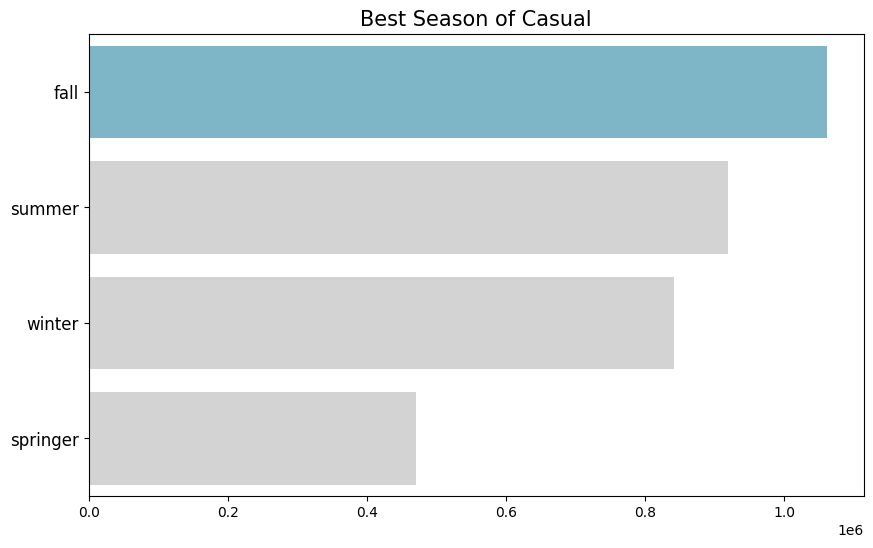

In [202]:
fig, ax = plt.subplots(figsize=(10,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(season_df.sort_values('cnt', ascending=False), y='season', x='cnt', palette=colors)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Season of Casual", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

### Bagaimana performa rental sepeda beberapa bulan terakhir?

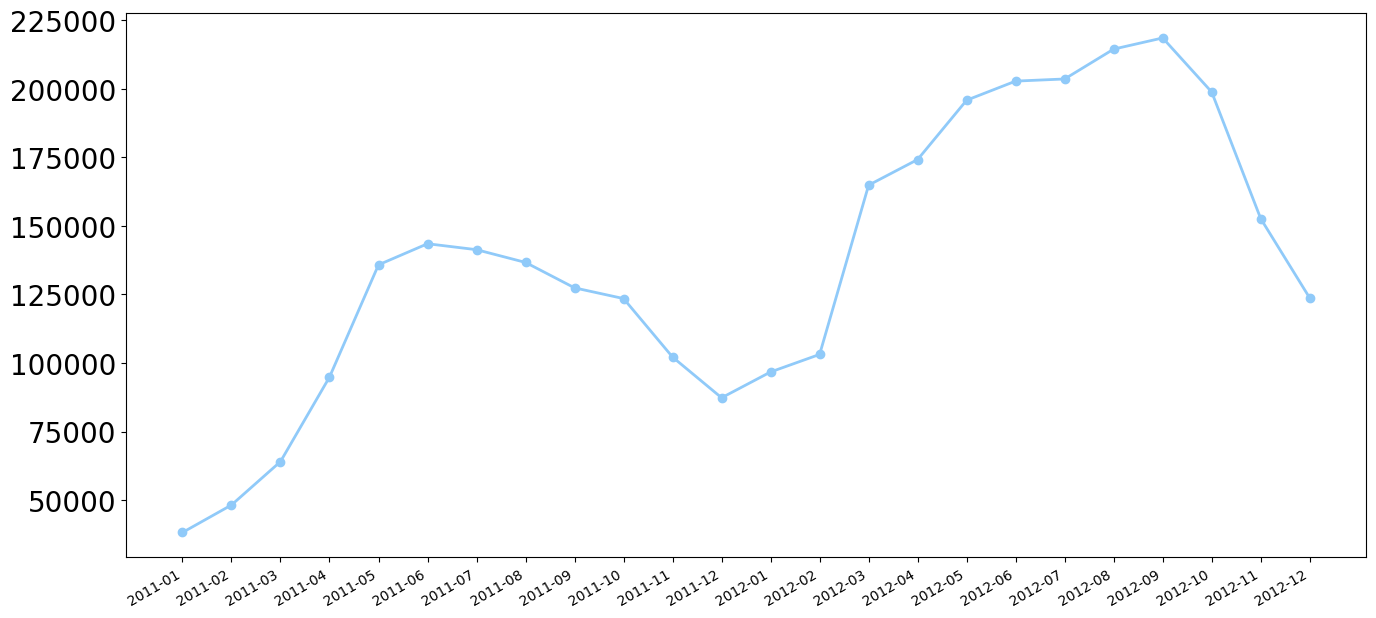

In [203]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    monthly_df["dteday"],
    monthly_df["cnt"],
    marker='o', 
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=10)
fig.autofmt_xdate()

## Conclusion

- Di musim apa performa rental tertinggi

    fall menjadi musim dengan jumlah penyewaan sepeda tertinggi, Sedangkan springer menjadi musim dengan jumlah penyewaan sepeda terendah.
- Bagaimana performa rental sepeda beberapa bulan terakhir?

    Penurunan secara signifikan terus terjadi tiap menuju akhir tahun, yaitu pada bulan 7 hingga bulan 12, sedangkan pada bulan lainnya mengalami peningkatan